# Titanic Survival prediction

Objective: To accurately predict the survivors using pertinent features

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd 

#libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#igone warning
import warnings
warnings.filterwarnings('ignore')

#Importing models
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC





In [2]:
# Reding data sets and exploring them
train_df = pd.read_csv('Desktop/train.csv')
test_df = pd.read_csv("Desktop/test.csv")
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
print(pd.isnull(train_df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


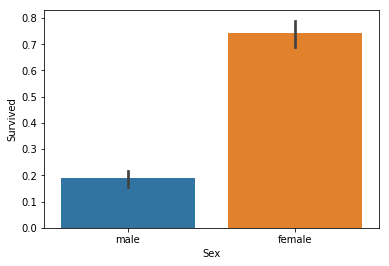

In [6]:
#visualization
sns.barplot(x ='Sex', y ='Survived', data = train_df)

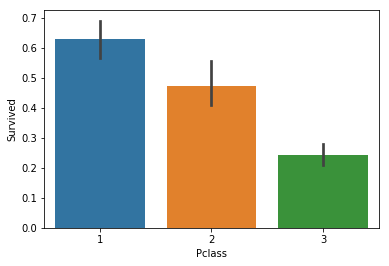

In [7]:
sns.barplot(x ='Pclass', y ='Survived', data = train_df)

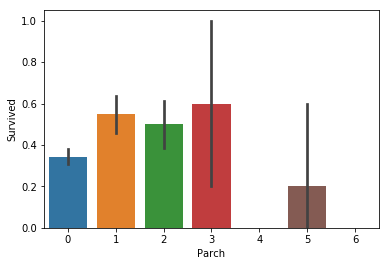

In [8]:
sns.barplot(x="Parch", y="Survived", data=train_df)


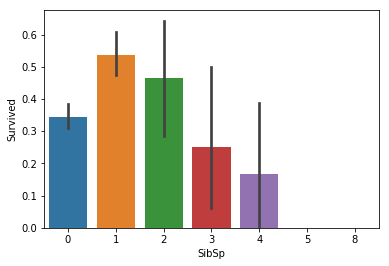

In [9]:
sns.barplot(x="SibSp", y="Survived", data=train_df)


In [10]:
# Data Cleaning
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [11]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
pd.isnull(test_df['Cabin']).sum() # Too many NA values 

327

In [13]:
# Too many NA values so Cabin column is unnecessary 
test_df = test_df.drop(['Cabin'], axis = 1)
train_df = train_df.drop(['Cabin'], axis = 1)


In [14]:
#Dropping the ticket/Fare column(seems unnecessary)
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)
train_df = train_df.drop(['Fare'], axis = 1)
test_df = test_df.drop(['Fare'], axis = 1)

In [15]:
#Name column is unnecessary so drop
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

In [16]:
# Embarked column has 2 missing values
pd.isnull(train_df['Embarked']).sum() 

2

In [17]:
# People who embarked at Southhampton are clearly the majority with 644 people
print((train_df["Embarked"] == "S").value_counts())
print((train_df["Embarked"] == "C").value_counts())
print((train_df["Embarked"] == "Q").value_counts())

True     644
False    247
Name: Embarked, dtype: int64
False    723
True     168
Name: Embarked, dtype: int64
False    814
True      77
Name: Embarked, dtype: int64


In [18]:
# Fill the missing value in Embarked column with Southhampton
train_df = train_df.fillna({"Embarked": "S"})

#Checking if the missing values have been filled 
pd.isnull(train_df['Embarked']).sum() 

0

In [19]:
# Assigning the embark values to numerical
print(train_df['Embarked'].dtype)
print (type(train_df.loc[0, 'Embarked']))

object
<class 'str'>


In [20]:
# Assigning the embark values to numerical
map_embark = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked'] = train_df['Embarked'].map(map_embark)
test_df['Embarked'] = test_df['Embarked'].map(map_embark)

train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,1
1,2,1,1,female,38.0,1,0,2
2,3,1,3,female,26.0,0,0,1
3,4,1,1,female,35.0,1,0,1
4,5,0,3,male,35.0,0,0,1


In [21]:
#Age column has 177 missing values
pd.isnull(train_df['Age']).sum() 

177

In [22]:
# Change values in sex column to numerical by mapping
sex_mapping = {"male": 0, "female": 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,1
1,2,1,1,1,38.0,1,0,2
2,3,1,3,1,26.0,0,0,1
3,4,1,1,1,35.0,1,0,1
4,5,0,3,0,35.0,0,0,1
5,6,0,3,0,NaN,0,0,3
6,7,0,1,0,54.0,0,0,1
7,8,0,3,0,2.0,3,1,1
8,9,1,3,1,27.0,0,2,1
9,10,1,2,1,14.0,1,0,2


In [23]:
# filling missing values in Age column with random numvers which are computed based on the mean age value in regards to the standard deviation and is_null
data = [train_df, test_df]

for dataset in data:
    age_mean = train_df["Age"].mean()
    age_std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(age_mean - age_std, age_mean + age_std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)


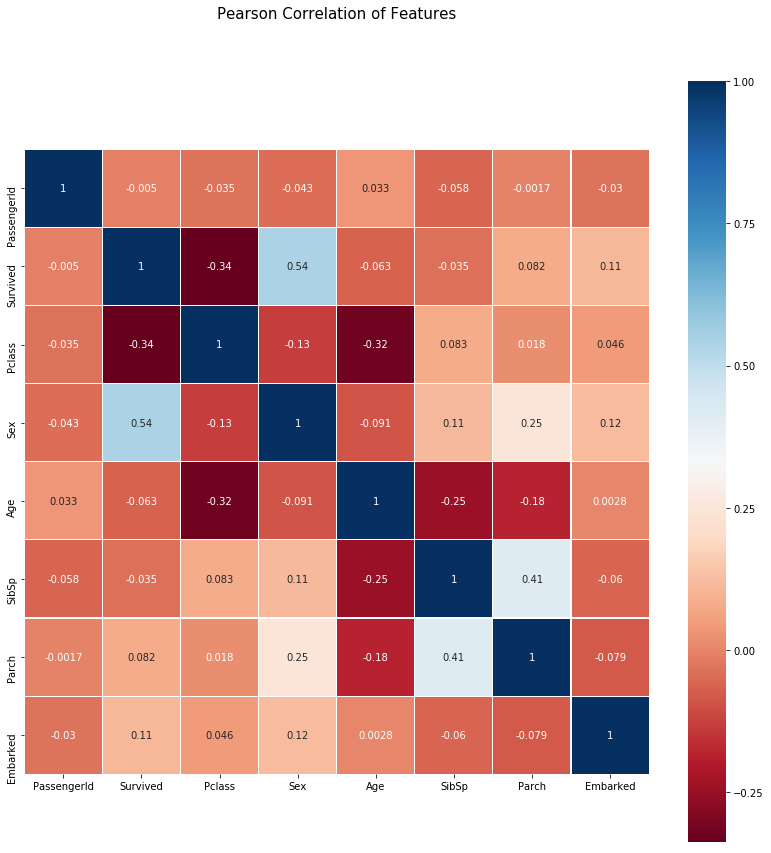

In [24]:
# Now all columns are numeric, trying to see the correlation   
colormap = plt.cm.RdBu
plt.figure(figsize=(14,14))
plt.title('Pearson Correlation of Features', y=1.20, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [25]:
# Test/Train split 

predictors = train_df.drop(['Survived', 'PassengerId'], axis=1)
target = train_df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)


In [26]:
# Gaussian Naive Bayes


gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.92


In [27]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)


78.48


In [28]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

83.41


In [29]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

36.77


In [30]:
#Decision Tree

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

78.03


In [31]:
# Random Forest

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

79.37


In [32]:
# KNN or k-Nearest Neighbors

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

76.23


In [33]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

79.37


In [34]:
# Gradient Boost 

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.86


In [35]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

77.13


In [36]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,83.86
0,Support Vector Machines,83.41
3,Random Forest,79.37
8,Stochastic Gradient Descent,79.37
4,Naive Bayes,78.92
2,Logistic Regression,78.48
7,Decision Tree,78.03
6,Linear SVC,77.13
1,KNN,76.23
5,Perceptron,36.77


Gradient Boosting Classifier was most accurate.
For improvement, maybe add Fare feature and do a better job with Sex column.